In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True,
                         download=False, data_dir='./')
train_dataset, test_dataset = dataset['train'], dataset['test']


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = (
    train_dataset
    .shuffle(BUFFER_SIZE)
    .padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset)))

test_dataset = (
    test_dataset
    .shuffle(BUFFER_SIZE)
    .padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset)))

<PaddedBatchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>
<PaddedBatchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 1003s 3s/step - loss: 0.5157 - accuracy: 0.7573 - val_loss: 0.6109 - val_accuracy: 0.7036
Epoch 2/10
391/391 [==============================] - 751s 2s/step - loss: 0.4241 - accuracy: 0.8172 - val_loss: 0.4329 - val_accuracy: 0.8034
Epoch 3/10
391/391 [==============================] - 790s 2s/step - loss: 0.3764 - accuracy: 0.8405 - val_loss: 0.5256 - val_accuracy: 0.7357
Epoch 4/10
391/391 [==============================] - 994s 3s/step - loss: 0.3192 - accuracy: 0.8718 - val_loss: 0.4289 - val_accuracy: 0.8120
Epoch 5/10
391/391 [==============================] - 742s 2s/step - loss: 0.4283 - accuracy: 0.8056 - val_loss: 0.4773 - val_accuracy: 0.7952
Epoch 6/10
391/391 [==============================] - 706s 2s/step - loss: 0.2759 - accuracy: 0.8942 - val_loss: 0.4342 - val_accuracy: 0.8240
Epoch 7/10
391/391 [==============================] - 702s 2s/step - loss: 0.1930 - accuracy: 0.9319 - val_loss: 0.4474 - val_accuracy: 0.833

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.title(string)
    plt.show()

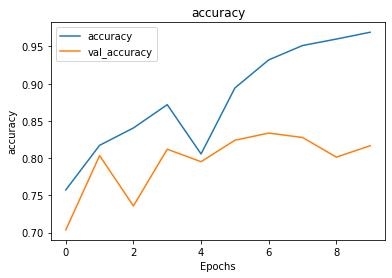

In [11]:
plot_graphs(history, 'accuracy')

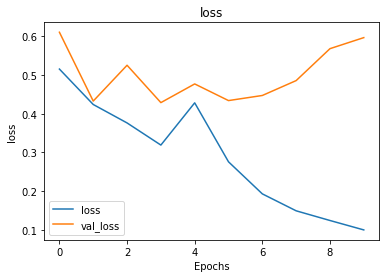

In [12]:
plot_graphs(history, 'loss')

In [13]:
model.save('multiple_lstm.h5')